# week 8 - assignment - imputation

Each XLS or XLSX file contains a dataframe. ​

Load each XLS or XLSX file in your Jupyter notebook. ​

For each dataframe, address missing values by taking the following steps:​

Count the number of missing values in the dataframe; count the number of missing values per column​
Plot the distribution of data points using a histogram​
Create a lag plot (a lag plot shows t versus t+1)​
Based on the lag plot, state in a markdown cell whether the order of this data matters. ​
Do one of the following (not both):​
If the order of the data matters, then interpolate the missing values​
If the order of the data does not matter, fill in the missing data by sampling from the distribution​
Create a scatter plot using the columns in dataframe; no Nan entries should be present​
Submit a single Jupyter notebook with your analysis of the XLSX and XLS files.​

Perform interpolation or sampling programmatically using Python (not manually)​ ​ ​

### First let's import the libraries

In [1]:
!pip install xlrd

In [2]:
import pandas as pd
import numpy as np

### Let's load datasets

In [3]:
df1 = pd.read_excel('imputation_homework_04.xls', index_col=[0])
df1.head()

,time,value
0,0.00,0.000000
1,0.02,2.528779
2,0.04,2.419020
3,0.06,0.665052
4,0.08,0.506655


In [4]:
df2 = pd.read_excel('imputation_homework_29.xlsX',index_col=[0] )
df2.head()

,x,y
0,1.40,10.00
1,1.45,10.25
2,1.50,10.50
3,1.55,10.75
4,1.60,11.00


In [5]:
df3 = pd.read_excel('imputation_homework_91.xlsx', index_col=[0])
df3.head()

,date,value
0,2015-11-03,30.001248
1,2015-11-04,4.655104
2,2015-11-05,15.621201
3,2015-11-06,22.982759
4,2015-11-07,39.994644


#### Let's create a function to count missing value count

In [6]:
def count_missing_values(df):
    colum_wise_null_values = df.isnull().sum()
    total_null_values =  colum_wise_null_values.sum()
    return "Total count of null values in given dataframe is : %d\n\n Column wise null value counts are:\n%s"%(total_null_values, colum_wise_null_values)

#### Now creating function to plot histogram

In [7]:
def plot_histogram(df):
    return df.hist(figsize=(10,5))

#### Now creating function to plot lag plot

In [8]:
def plot_lag_plot(values):
    return pd.plotting.lag_plot(values)

#### Let's consider first dataframe

##### Let's find null values

In [9]:
print(count_missing_values(df1))

Total count of null values in given dataframe is : 50

 Column wise null value counts are:
time      0
value    50
dtype: int64


##### Now plot histogram

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'value'}>]], dtype=object)

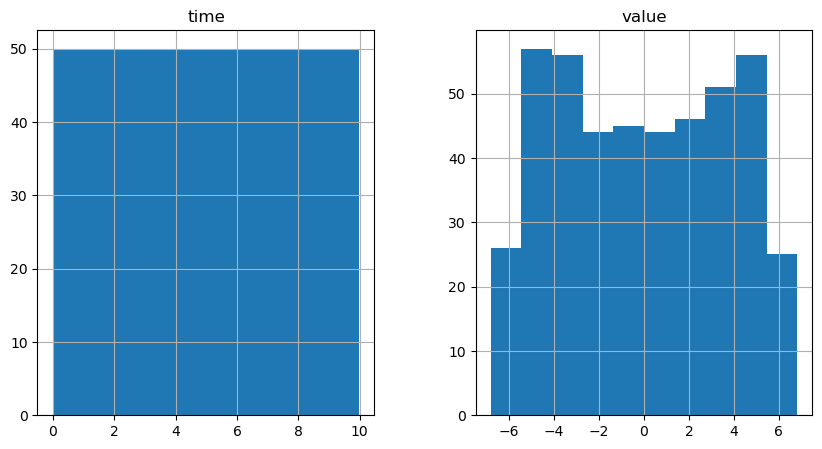

In [10]:
plot_histogram(df1)

##### Let's plot lag plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

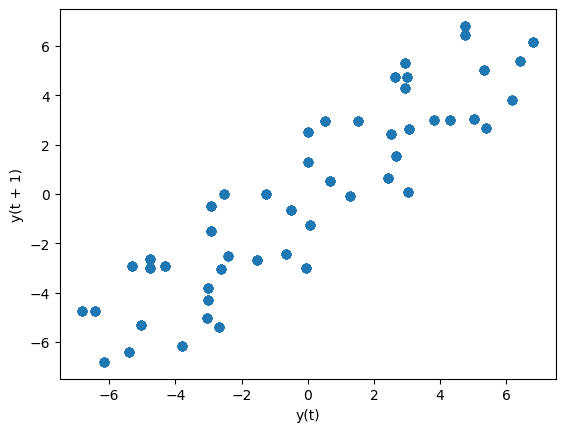

In [11]:
plot_lag_plot(df1['value'])

From above lag plot we can determine that the points cluster along a diagonal line from the bottom-left to the top-right of the plot suggests a positive correlation. (<a href="https://machinelearningmastery.com/time-series-data-visualization-with-python/">source</a>) Hence here order of the data matters

##### Let's interpolate dataframe

In [12]:
df1=df1.interpolate()
print(count_missing_values(df1))

Total count of null values in given dataframe is : 0

 Column wise null value counts are:
time     0
value    0
dtype: int64


##### Let's create a scatterplot

<Axes: xlabel='time', ylabel='value'>

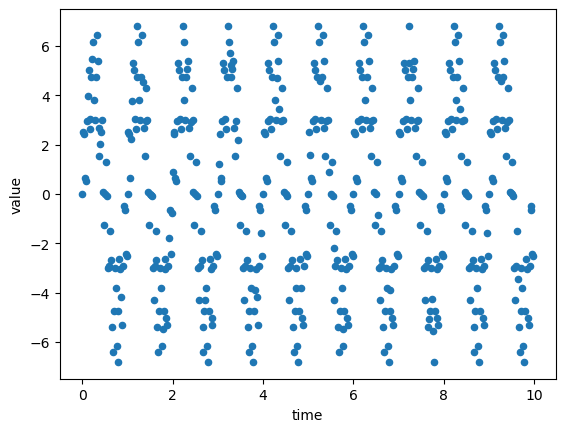

In [13]:
df1.plot.scatter(x='time', y='value')

#### Let's consider second dataframe

##### Let's find null values

In [14]:
print(count_missing_values(df2))

Total count of null values in given dataframe is : 9

 Column wise null value counts are:
x    9
y    0
dtype: int64


##### Now plot histogram

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

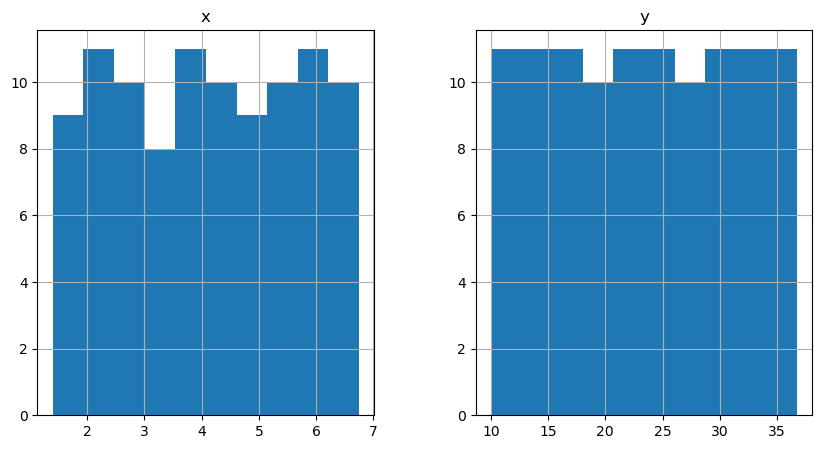

In [15]:
plot_histogram(df2)

##### Let's plot lag plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

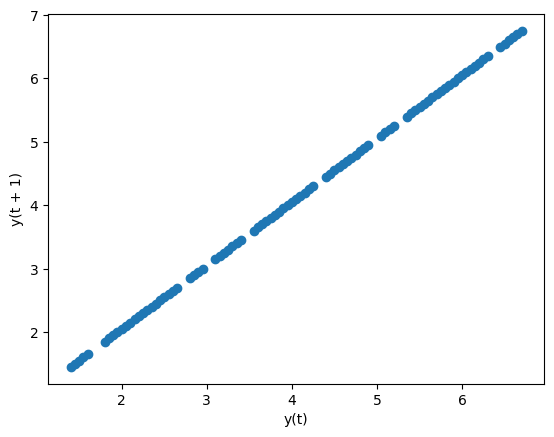

In [16]:
plot_lag_plot(df2['x'])

From above lag plot we can determine that the points cluster along a diagonal line from the bottom-left to the top-right of the plot suggests a positive correlation. (<a href="https://machinelearningmastery.com/time-series-data-visualization-with-python/">source</a>) Hence here order of the data matters

##### Let's interpolate dataframe

In [17]:
df2=df2.interpolate()
print(count_missing_values(df2))

Total count of null values in given dataframe is : 0

 Column wise null value counts are:
x    0
y    0
dtype: int64


##### Let's create a scatterplot

<Axes: xlabel='x', ylabel='y'>

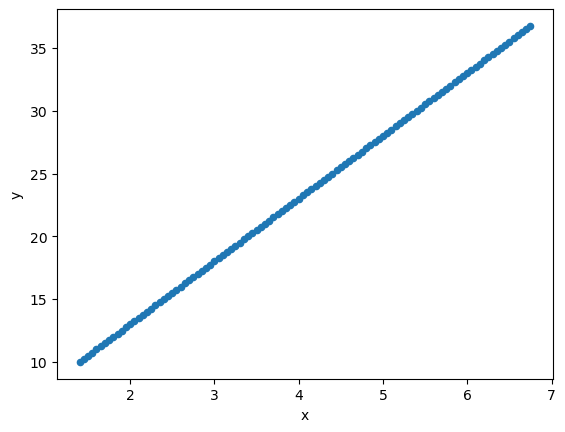

In [18]:
df2.plot.scatter(x='x',y='y')

### Let's consider third dataframe

##### Let's find null values

In [19]:
print(count_missing_values(df3))

Total count of null values in given dataframe is : 84

 Column wise null value counts are:
date      0
value    84
dtype: int64


##### Now plot histogram

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'value'}>]], dtype=object)

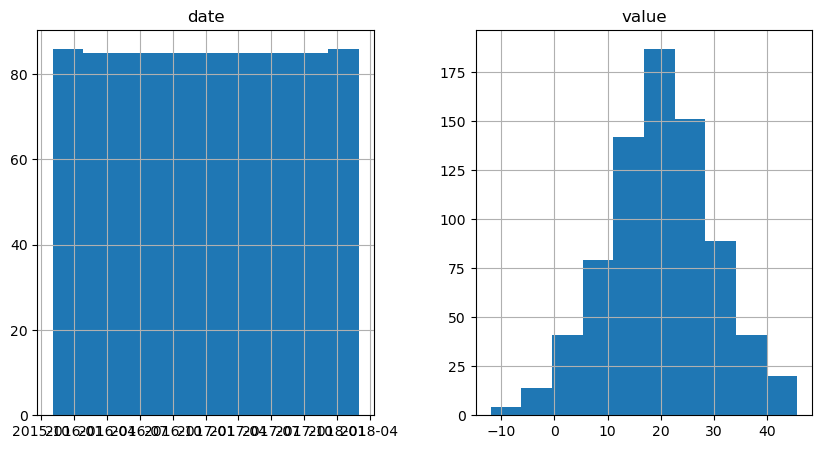

In [20]:
plot_histogram(df3)

##### Let's plot lag plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

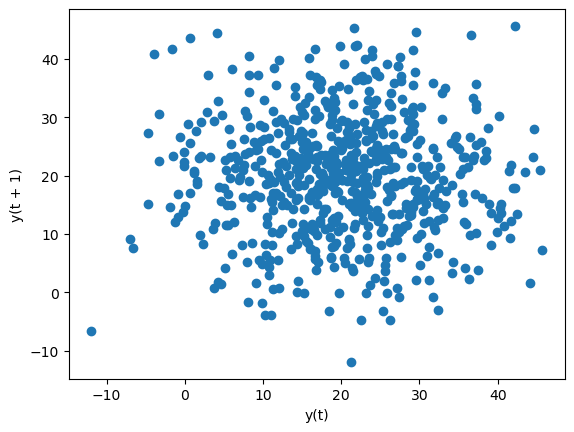

In [21]:
plot_lag_plot(df3['value'])

From above lag plot we can determine that the data is random. It looks like gaussian distribution. So order of data does not matter.

##### Let's fill missing values by taking sample from the distribution


In [22]:
# Reference https://stackoverflow.com/a/44867504
non_null_values = df3.dropna()
value_distribution_counts = non_null_values['value'].value_counts(normalize=True)
df3.loc[df3['value'].isnull(), 'value'] = np.random.choice(value_distribution_counts.index, size=len(df3[df3['value'].isnull()]), p=value_distribution_counts.values)

##### Let's create a scatterplot

<Axes: xlabel='date', ylabel='value'>

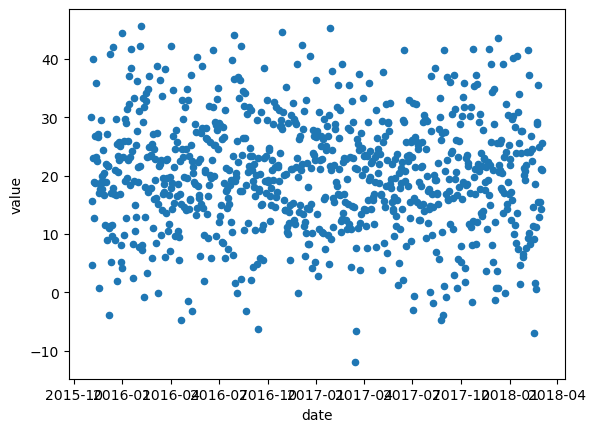

In [23]:
df3.plot.scatter(x='date', y='value')